In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statistics import mean
from time import sleep
from mpl_toolkits import mplot3d


In [2]:
plt.rcParams.update({'font.size': 20})

In [3]:
def df_col_diff(df, columns):
    for i in range(len(columns)): 
        col = columns[i]
        name = col+'_diff'
        df[name] = df[col].diff()
    return df

def align_df(QOS_df, usage_df):
    time_diff = []
    shift = len(QOS_df[QOS_df['QOS'] == 0])

    if QOS_df['QOS'][shift] > 5 * QOS_df['QOS'][shift:].mean():
        QOS_df = QOS_df[shift+1:]
    else:
        QOS_df = QOS_df[shift:]

    usage_df_temp = usage_df[shift:]
    usage_df_temp = usage_df_temp[:len(QOS_df)]
    min_len = min(len(QOS_df),len(usage_df_temp))
    
    for i in range(min_len-1): 
        diff = QOS_df['time'].iloc[i] - usage_df_temp['time'].iloc[i]
        time_diff.append(diff)
    
    if mean(time_diff) < -30:
        usage_df = usage_df[shift-7:]
    elif -30 <= mean(time_diff) < -25:
        usage_df = usage_df[shift-6:]
    elif -25 <= mean(time_diff) < -20:
        usage_df = usage_df[shift-5:]
    elif -20 <= mean(time_diff) < -15:
        usage_df = usage_df[shift-4:]
    elif -15 <= mean(time_diff) < -10:
        usage_df = usage_df[shift-3:]
    elif -10 <= mean(time_diff) < -5:
        usage_df = usage_df[shift-2:]
    elif -5 <= mean(time_diff) < -2.5:
        usage_df = usage_df[shift-1:]
    elif -2.5 <= mean(time_diff) <= 2.5:
        usage_df = usage_df[shift:]
    elif 2.5 < mean(time_diff) <= 5:
        usage_df = usage_df[shift+1:]
    elif 5 < mean(time_diff) <= 10:
        usage_df = usage_df[shift+2:]
    elif 10 < mean(time_diff) <= 15:
        usage_df = usage_df[shift+3:]
    elif 15 < mean(time_diff) <= 20:
        usage_df = usage_df[shift+4:]
    elif 20 < mean(time_diff) <= 25:
        usage_df = usage_df[shift+5:]
    elif 25 < mean(time_diff) <= 30:
        usage_df = usage_df[shift+6:]
    else:
        usage_df = usage_df[shift+7:]

    return QOS_df, usage_df[:len(QOS_df)]

def dataPrep(rpi_name, data_name, cols):
    usage_data = pd.read_csv('data/{}/usage_data_{}_{}.csv'.format(rpi_name,rpi_name,data_name), index_col = 'time_stamp')
    QOS_data = pd.read_csv('data/{}/QOS_data_{}_{}.csv'.format(rpi_name,rpi_name,data_name), index_col = 'time_stamp')
    RCoin = pd.read_csv('data/{}/RCoin_{}_{}.csv'.format(rpi_name,rpi_name,data_name))

    QOS_data, usage_data = align_df(QOS_data, usage_data)

    usage_data = df_col_diff(usage_data, cols)


    for index, row in RCoin.iterrows():
        if  isinstance(row['Training Losses'], float):
            RCoin.at[index,'Training Loss'] = row['Training Losses']
        else:
            x = row['Training Losses'].split(' ')[-1][:-1]
            RCoin.at[index,'Training Loss'] = x
            

    usage_data['cpu_times_ipykernel_percent'] = (usage_data['cpu_times_user_ipykernel_diff']+usage_data['cpu_times_system_ipykernel_diff'])/(usage_data['cpu_user_time_diff']+usage_data['cpu_system_time_diff'])

    return usage_data, QOS_data, RCoin

In [4]:
cols = ['cpu_user_time', 'cpu_system_time','cpu_idle_time', 'net_sent', 'net_recv', 'io_counters_read_bytes_ipykernel', 'io_counters_write_bytes_ipykernel', 'cpu_times_user_ipykernel', 'cpu_times_system_ipykernel','cpu_times_children_user_ipykernel', 'cpu_times_children_system_ipykernel', 'memory_percent_ipykernel']

# RPi 4 - 8 GB RAM - 1500 Hz CPU freq

In [5]:
usage_RPi8_1500_Stationary, QOS_RPi8_1500_Stationary, RCoin_RPi8_1500_Stationary = dataPrep('RPi8_1500', 'Stationary', cols)

usage_RPi8_1500_Stationary_2, QOS_RPi8_1500_Stationary_2, RCoin_RPi8_1500_Stationary_2 = dataPrep('RPi8_1500', 'Stationary_2', cols)

usage_RPi8_1500_Stationary_Streaming, QOS_RPi8_1500_Stationary_Streaming, RCoin_RPi8_1500_Stationary_Streaming = dataPrep('RPi8_1500', 'Stationary_Streaming', cols)

usage_RPi8_1500_Stationary_Streaming_2, QOS_RPi8_1500_Stationary_Streaming_2, RCoin_RPi8_1500_Stationary_Streaming_2 = dataPrep('RPi8_1500', 'Stationary_Streaming_2', cols)

usage_RPi8_1500_Stationary_WIFI, QOS_RPi8_1500_Stationary_WIFI, RCoin_RPi8_1500_Stationary_WIFI = dataPrep('RPi8_1500', 'Stationary_WIFI', cols)

usage_RPi8_1500_Stationary_WIFI_2, QOS_RPi8_1500_Stationary_WIFI_2, RCoin_RPi8_1500_Stationary_WIFI_2 = dataPrep('RPi8_1500', 'Stationary_WIFI_2', cols)

usage_RPi8_1500_Stationary_Streaming_WIFI, QOS_RPi8_1500_Stationary_Streaming_WIFI, RCoin_RPi8_1500_Stationary_Streaming_WIFI = dataPrep('RPi8_1500', 'Stationary_Streaming_WIFI', cols)

usage_RPi8_1500_Stationary_Streaming_WIFI_2, QOS_RPi8_1500_Stationary_Streaming_WIFI_2, RCoin_RPi8_1500_Stationary_Streaming_WIFI_2 = dataPrep('RPi8_1500', 'Stationary_Streaming_WIFI_2', cols)

usage_RPi8_1500_Stationary_Games_WIFI, QOS_RPi8_1500_Stationary_Games_WIFI, RCoin_RPi8_1500_Stationary_Games_WIFI = dataPrep('RPi8_1500', 'Stationary_Games_WIFI', cols)

usage_RPi8_1500_Stationary_Games_WIFI_2, QOS_RPi8_1500_Stationary_Games_WIFI_2, RCoin_RPi8_1500_Stationary_Games_WIFI_2 = dataPrep('RPi8_1500', 'Stationary_Games_WIFI_2', cols)


# RPi 4 - 4 GB RAM - 1000 Hz CPU freq

In [6]:
usage_RPi4_1000_Stationary, QOS_RPi4_1000_Stationary, RCoin_RPi4_1000_Stationary = dataPrep('RPi4_1000', 'Stationary', cols)

usage_RPi4_1000_Stationary_2, QOS_RPi4_1000_Stationary_2, RCoin_RPi4_1000_Stationary_2 = dataPrep('RPi4_1000', 'Stationary_2', cols)

usage_RPi4_1000_Stationary_Streaming, QOS_RPi4_1000_Stationary_Streaming, RCoin_RPi4_1000_Stationary_Streaming = dataPrep('RPi4_1000', 'Stationary_Streaming', cols)

usage_RPi4_1000_Stationary_Streaming_2, QOS_RPi4_1000_Stationary_Streaming_2, RCoin_RPi4_1000_Stationary_Streaming_2 = dataPrep('RPi4_1000', 'Stationary_Streaming_2', cols)

usage_RPi4_1000_Stationary_WIFI, QOS_RPi4_1000_Stationary_WIFI, RCoin_RPi4_1000_Stationary_WIFI = dataPrep('RPi4_1000', 'Stationary_WIFI', cols)

usage_RPi4_1000_Stationary_WIFI_2, QOS_RPi4_1000_Stationary_WIFI_2, RCoin_RPi4_1000_Stationary_WIFI_2 = dataPrep('RPi4_1000', 'Stationary_WIFI_2', cols)

usage_RPi4_1000_Stationary_Streaming_WIFI, QOS_RPi4_1000_Stationary_Streaming_WIFI, RCoin_RPi4_1000_Stationary_Streaming_WIFI = dataPrep('RPi4_1000', 'Stationary_Streaming_WIFI', cols)

usage_RPi4_1000_Stationary_Streaming_WIFI_2, QOS_RPi4_1000_Stationary_Streaming_WIFI_2, RCoin_RPi4_1000_Stationary_Streaming_WIFI_2 = dataPrep('RPi4_1000', 'Stationary_Streaming_WIFI_2', cols)

usage_RPi4_1000_Stationary_Games_WIFI, QOS_RPi4_1000_Stationary_Games_WIFI, RCoin_RPi4_1000_Stationary_Games_WIFI = dataPrep('RPi4_1000', 'Stationary_Games_WIFI', cols)

usage_RPi4_1000_Stationary_Games_WIFI_2, QOS_RPi4_1000_Stationary_Games_WIFI_2, RCoin_RPi4_1000_Stationary_Games_WIFI_2 = dataPrep('RPi4_1000', 'Stationary_Games_WIFI_2', cols)

# RPi 4 - 2 GB RAM - 600 Hz CPU freq

In [7]:
usage_RPi2_600_Stationary, QOS_RPi2_600_Stationary, RCoin_RPi2_600_Stationary = dataPrep('RPi2_600', 'Stationary', cols)

usage_RPi2_600_Stationary_2, QOS_RPi2_600_Stationary_2, RCoin_RPi2_600_Stationary_2 = dataPrep('RPi2_600', 'Stationary_2', cols)

usage_RPi2_600_Stationary_Streaming, QOS_RPi2_600_Stationary_Streaming, RCoin_RPi2_600_Stationary_Streaming = dataPrep('RPi2_600', 'Stationary_Streaming', cols)

usage_RPi2_600_Stationary_Streaming_2, QOS_RPi2_600_Stationary_Streaming_2, RCoin_RPi2_600_Stationary_Streaming_2 = dataPrep('RPi2_600', 'Stationary_Streaming_2', cols)

usage_RPi2_600_Stationary_WIFI, QOS_RPi2_600_Stationary_WIFI, RCoin_RPi2_600_Stationary_WIFI = dataPrep('RPi2_600', 'Stationary_WIFI', cols)

usage_RPi2_600_Stationary_WIFI_2, QOS_RPi2_600_Stationary_WIFI_2, RCoin_RPi2_600_Stationary_WIFI_2 = dataPrep('RPi2_600', 'Stationary_WIFI_2', cols)

usage_RPi2_600_Stationary_Streaming_WIFI, QOS_RPi2_600_Stationary_Streaming_WIFI, RCoin_RPi2_600_Stationary_Streaming_WIFI = dataPrep('RPi2_600', 'Stationary_Streaming_WIFI', cols)

usage_RPi2_600_Stationary_Streaming_WIFI_2, QOS_RPi2_600_Stationary_Streaming_WIFI_2, RCoin_RPi2_600_Stationary_Streaming_WIFI_2 = dataPrep('RPi2_600', 'Stationary_Streaming_WIFI_2', cols)

usage_RPi2_600_Stationary_Games_WIFI, QOS_RPi2_600_Stationary_Games_WIFI, RCoin_RPi2_600_Stationary_Games_WIFI = dataPrep('RPi2_600', 'Stationary_Games_WIFI', cols)

usage_RPi2_600_Stationary_Games_WIFI_2, QOS_RPi2_600_Stationary_Games_WIFI_2, RCoin_RPi2_600_Stationary_Games_WIFI_2 = dataPrep('RPi2_600', 'Stationary_Games_WIFI_2', cols)

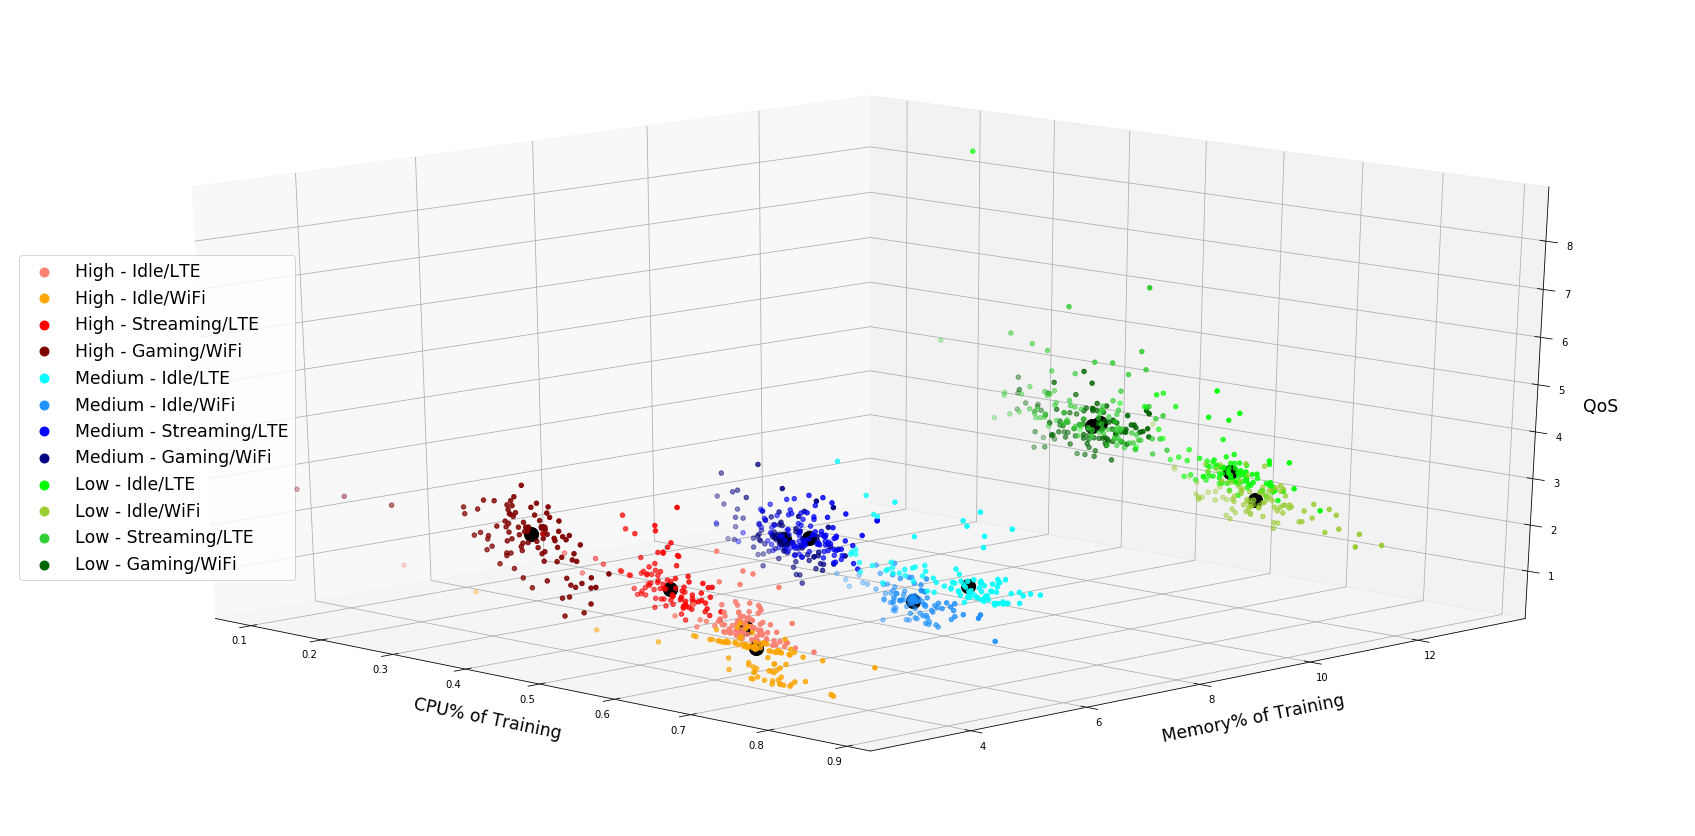

In [8]:
%matplotlib inline

fig = plt.figure(figsize=(30, 15))
ax = plt.axes(projection='3d')

limit = 100
shift = 50
QOS = 'QOS'
feature_1='cpu_times_ipykernel_percent'
feature_2= 'memory_percent_ipykernel'


#centroid
ax.scatter3D(usage_RPi8_1500_Stationary_2[feature_1].iloc[shift:shift+limit].median(),usage_RPi8_1500_Stationary_2[feature_2][shift:shift+limit].median(),QOS_RPi8_1500_Stationary_2[QOS][shift:shift+limit].median(), color = 'black', s=200)
ax.scatter3D(usage_RPi8_1500_Stationary_WIFI_2[feature_1][shift:shift+limit].median(),usage_RPi8_1500_Stationary_WIFI_2[feature_2][shift:shift+limit].median(),QOS_RPi8_1500_Stationary_WIFI_2[QOS][shift:shift+limit].median(), color = 'black', s=200)
ax.scatter3D(usage_RPi8_1500_Stationary_Streaming_2[feature_1][shift:shift+limit].median(),usage_RPi8_1500_Stationary_Streaming_2[feature_2][shift:shift+limit].median(),QOS_RPi8_1500_Stationary_Streaming_2[QOS][shift:shift+limit].median(), color = 'black', s=200)
ax.scatter3D(usage_RPi8_1500_Stationary_Games_WIFI_2[feature_1][shift:shift+limit].median(),usage_RPi8_1500_Stationary_Games_WIFI_2[feature_2][shift:shift+limit].median(),QOS_RPi8_1500_Stationary_Games_WIFI_2[QOS][shift:shift+limit].median(), color = 'black', s=200)
#measurements
ax.scatter3D(usage_RPi8_1500_Stationary_2[feature_1].iloc[shift:shift+limit],usage_RPi8_1500_Stationary_2[feature_2][shift:shift+limit],QOS_RPi8_1500_Stationary_2[QOS][shift:shift+limit], color = 'salmon',label = 'High - Idle/LTE')
ax.scatter3D(usage_RPi8_1500_Stationary_WIFI_2[feature_1][shift:shift+limit],usage_RPi8_1500_Stationary_WIFI_2[feature_2][shift:shift+limit],QOS_RPi8_1500_Stationary_WIFI_2[QOS][shift:shift+limit], color = 'orange',label = 'High - Idle/WiFi')
ax.scatter3D(usage_RPi8_1500_Stationary_Streaming_2[feature_1][shift:shift+limit],usage_RPi8_1500_Stationary_Streaming_2[feature_2][shift:shift+limit],QOS_RPi8_1500_Stationary_Streaming_2[QOS][shift:shift+limit], color = 'red',label = 'High - Streaming/LTE') 
ax.scatter3D(usage_RPi8_1500_Stationary_Games_WIFI_2[feature_1][shift:shift+limit],usage_RPi8_1500_Stationary_Games_WIFI_2[feature_2][shift:shift+limit],QOS_RPi8_1500_Stationary_Games_WIFI_2[QOS][shift:shift+limit], color = 'maroon',label = 'High - Gaming/WiFi') 


#centroid
ax.scatter3D(usage_RPi4_1000_Stationary_2[feature_1][shift:shift+limit].median(),usage_RPi4_1000_Stationary_2[feature_2][shift:shift+limit].median(),QOS_RPi4_1000_Stationary_2[QOS][shift:shift+limit].median(), color = 'black', s=200)
ax.scatter3D(usage_RPi4_1000_Stationary_WIFI_2[feature_1][shift:shift+limit].median(),usage_RPi4_1000_Stationary_WIFI_2[feature_2][shift:shift+limit].median(),QOS_RPi4_1000_Stationary_WIFI_2[QOS][shift:shift+limit].median(), color = 'black', s=200)
ax.scatter3D(usage_RPi4_1000_Stationary_Streaming_2[feature_1][shift:shift+limit].median(),usage_RPi4_1000_Stationary_Streaming_2[feature_2][shift:shift+limit].median(),QOS_RPi4_1000_Stationary_Streaming_2[QOS][shift:shift+limit].median(), color = 'black', s=200)
ax.scatter3D(usage_RPi4_1000_Stationary_Games_WIFI_2[feature_1][shift:shift+limit].median(),usage_RPi4_1000_Stationary_Games_WIFI_2[feature_2][shift:shift+limit].median(),QOS_RPi4_1000_Stationary_Games_WIFI_2[QOS][shift:shift+limit].median(), color = 'black', s=200)
#measurements
ax.scatter3D(usage_RPi4_1000_Stationary_2[feature_1][shift:shift+limit],usage_RPi4_1000_Stationary_2[feature_2][shift:shift+limit],QOS_RPi4_1000_Stationary_2[QOS][shift:shift+limit], color = 'cyan',label = 'Medium - Idle/LTE')
ax.scatter3D(usage_RPi4_1000_Stationary_WIFI_2[feature_1][shift:shift+limit],usage_RPi4_1000_Stationary_WIFI_2[feature_2][shift:shift+limit],QOS_RPi4_1000_Stationary_WIFI_2[QOS][shift:shift+limit], color = 'dodgerblue',label = 'Medium - Idle/WiFi')
ax.scatter3D(usage_RPi4_1000_Stationary_Streaming_2[feature_1][shift:shift+limit],usage_RPi4_1000_Stationary_Streaming_2[feature_2][shift:shift+limit],QOS_RPi4_1000_Stationary_Streaming_2[QOS][shift:shift+limit], color = 'blue',label = 'Medium - Streaming/LTE') 
ax.scatter3D(usage_RPi4_1000_Stationary_Games_WIFI_2[feature_1][shift:shift+limit],usage_RPi4_1000_Stationary_Games_WIFI_2[feature_2][shift:shift+limit],QOS_RPi4_1000_Stationary_Games_WIFI_2[QOS][shift:shift+limit], color = 'navy',label = 'Medium - Gaming/WiFi')


#centroid
ax.scatter3D(usage_RPi2_600_Stationary_2[feature_1][shift:shift+limit].median(),usage_RPi2_600_Stationary_2[feature_2][shift:shift+limit].median(),QOS_RPi2_600_Stationary_2[QOS][shift:shift+limit].median(), color = 'black', s=200)
ax.scatter3D(usage_RPi2_600_Stationary_WIFI_2[feature_1][shift:shift+limit].median(),usage_RPi2_600_Stationary_WIFI_2[feature_2][shift:shift+limit].median(),QOS_RPi2_600_Stationary_WIFI_2[QOS][shift:shift+limit].median(), color = 'black', s=200)
ax.scatter3D(usage_RPi2_600_Stationary_Streaming_2[feature_1][shift:shift+limit].median(),usage_RPi2_600_Stationary_Streaming_2[feature_2][shift:shift+limit].median(),QOS_RPi2_600_Stationary_Streaming_2[QOS][shift:shift+limit].median(), color = 'black', s=200)
ax.scatter3D(usage_RPi2_600_Stationary_Games_WIFI_2[feature_1][shift:shift+limit].median(),usage_RPi2_600_Stationary_Games_WIFI_2[feature_2][shift:shift+limit].median(),QOS_RPi2_600_Stationary_Games_WIFI_2[QOS][shift:shift+limit].median(), color = 'black', s=200)
#measurements
ax.scatter3D(usage_RPi2_600_Stationary_2[feature_1][shift:shift+limit],usage_RPi2_600_Stationary_2[feature_2][shift:shift+limit],QOS_RPi2_600_Stationary_2[QOS][shift:shift+limit], color = 'lime',label = 'Low - Idle/LTE') 
ax.scatter3D(usage_RPi2_600_Stationary_WIFI_2[feature_1][shift:shift+limit],usage_RPi2_600_Stationary_WIFI_2[feature_2][shift:shift+limit],QOS_RPi2_600_Stationary_WIFI_2[QOS][shift:shift+limit], color = 'yellowgreen',label = 'Low - Idle/WiFi') 
ax.scatter3D(usage_RPi2_600_Stationary_Streaming_2[feature_1][shift:shift+limit],usage_RPi2_600_Stationary_Streaming_2[feature_2][shift:shift+limit],QOS_RPi2_600_Stationary_Streaming_2[QOS][shift:shift+limit], color = 'limegreen',label = 'Low - Streaming/LTE')
ax.scatter3D(usage_RPi2_600_Stationary_Games_WIFI_2[feature_1][shift:shift+limit],usage_RPi2_600_Stationary_Games_WIFI_2[feature_2][shift:shift+limit],QOS_RPi2_600_Stationary_Games_WIFI_2[QOS][shift:shift+limit], color = 'darkgreen',label = 'Low - Gaming/WiFi') 


ax.legend(loc='center left', fontsize='xx-large',markerscale=2)

ax.set_xlabel('CPU% of Training',labelpad=20, fontsize='xx-large')
ax.set_ylabel('Memory% of Training',labelpad=20, fontsize='xx-large')
ax.set_zlabel('QoS',labelpad=10, fontsize='xx-large')

ax.view_init(20, -45)

plt.show()

## All devices, loads, and tech 

In [9]:
fig, ax = plt.subplots(3, figsize=(30, 15))

QOS = 'QOS'

ax[0].scatter(usage_RPi8_1500_Stationary_2['cpu_times_ipykernel_percent'],QOS_RPi8_1500_Stationary_2[QOS], color = 'salmon',label = 'Stationary - RPi8_1500 - ipykernel')
ax[0].scatter(usage_RPi8_1500_Stationary_WIFI_2['cpu_times_ipykernel_percent'],QOS_RPi8_1500_Stationary_WIFI_2[QOS], color = 'orange',label = 'Stationary WIFI - RPi8_1500 - ipykernel')
ax[0].scatter(usage_RPi8_1500_Stationary_Streaming_2['cpu_times_ipykernel_percent'],QOS_RPi8_1500_Stationary_Streaming_2[QOS], color = 'red',label = 'Stationary Streaming - RPi8_1500 - ipykernel')  
ax[0].scatter(usage_RPi8_1500_Stationary_Games_WIFI_2['cpu_times_ipykernel_percent'],QOS_RPi8_1500_Stationary_Games_WIFI_2[QOS], color = 'maroon',label = 'Stationary Games WIFI - RPi8_1500 - ipykernel') 

ax[1].scatter(usage_RPi4_1000_Stationary_2['cpu_times_ipykernel_percent'],QOS_RPi4_1000_Stationary_2[QOS], color = 'cyan',label = 'Stationary - RPi4_1000 - ipykernel')
ax[1].scatter(usage_RPi4_1000_Stationary_WIFI_2['cpu_times_ipykernel_percent'],QOS_RPi4_1000_Stationary_WIFI_2[QOS], color = 'dodgerblue',label = 'Stationary WIFI - RPi4_1000 - ipykernel') 
ax[1].scatter(usage_RPi4_1000_Stationary_Streaming_2['cpu_times_ipykernel_percent'],QOS_RPi4_1000_Stationary_Streaming_2[QOS], color = 'blue',label = 'Stationary Streaming - RPi4_1000 - ipykernel') 
ax[1].scatter(usage_RPi4_1000_Stationary_Games_WIFI_2['cpu_times_ipykernel_percent'],QOS_RPi4_1000_Stationary_Games_WIFI_2[QOS], color = 'navy',label = 'Stationary Games WIFI - RPi4_1000 - ipykernel') 

ax[2].scatter(usage_RPi2_600_Stationary_2['cpu_times_ipykernel_percent'],QOS_RPi2_600_Stationary_2[QOS], color = 'lime',label = 'Stationary - RPi2_600 - ipykernel')
ax[2].scatter(usage_RPi2_600_Stationary_WIFI_2['cpu_times_ipykernel_percent'],QOS_RPi2_600_Stationary_WIFI_2[QOS], color = 'yellowgreen',label = 'Stationary WIFI- RPi2_600 - ipykernel')
ax[2].scatter(usage_RPi2_600_Stationary_Streaming_2['cpu_times_ipykernel_percent'],QOS_RPi2_600_Stationary_Streaming_2[QOS], color = 'limegreen',label = 'Stationary Streaming- RPi2_600 - ipykernel')
ax[2].scatter(usage_RPi2_600_Stationary_Games_WIFI_2['cpu_times_ipykernel_percent'],QOS_RPi2_600_Stationary_Games_WIFI_2[QOS], color = 'darkgreen',label = 'Stationary Games WIFI - RPi2_600 - ipykernel') 

ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[2].legend(loc='best')
ax[0].grid()
ax[1].grid()
ax[2].grid()


ax[0].set(ylabel="Training Iteration time (sec)", title="Training Iteration time vs cpu %")
ax[1].set(ylabel="Training Iteration time (sec)")
ax[2].set(xlabel="cpu %", ylabel="Training Iteration time (sec)")


plt.show()

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(3, figsize=(30, 15))

QOS = 'QOS'

ax[0].scatter(usage_RPi8_1500_Stationary_2['memory_percent_ipykernel'],QOS_RPi8_1500_Stationary_2[QOS], color = 'salmon',label = 'Stationary - RPi8_1500 - ipykernel')
ax[0].scatter(usage_RPi8_1500_Stationary_WIFI_2['memory_percent_ipykernel'],QOS_RPi8_1500_Stationary_WIFI_2[QOS], color = 'orange',label = 'Stationary WIFI - RPi8_1500 - ipykernel')
ax[0].scatter(usage_RPi8_1500_Stationary_Streaming_2['memory_percent_ipykernel'],QOS_RPi8_1500_Stationary_Streaming_2[QOS], color = 'red',label = 'Stationary Streaming - RPi8_1500 - ipykernel')  
ax[0].scatter(usage_RPi8_1500_Stationary_Games_WIFI_2['memory_percent_ipykernel'],QOS_RPi8_1500_Stationary_Games_WIFI_2[QOS], color = 'maroon',label = 'Stationary Games WIFI - RPi8_1500 - ipykernel') 

ax[1].scatter(usage_RPi4_1000_Stationary_2['memory_percent_ipykernel'],QOS_RPi4_1000_Stationary_2[QOS], color = 'cyan',label = 'Stationary - RPi4_1000 - ipykernel')
ax[1].scatter(usage_RPi4_1000_Stationary_WIFI_2['memory_percent_ipykernel'],QOS_RPi4_1000_Stationary_WIFI_2[QOS], color = 'dodgerblue',label = 'Stationary WIFI - RPi4_1000 - ipykernel') 
ax[1].scatter(usage_RPi4_1000_Stationary_Streaming_2['memory_percent_ipykernel'],QOS_RPi4_1000_Stationary_Streaming_2[QOS], color = 'blue',label = 'Stationary Streaming - RPi4_1000 - ipykernel') 
ax[1].scatter(usage_RPi4_1000_Stationary_Games_WIFI_2['memory_percent_ipykernel'],QOS_RPi4_1000_Stationary_Games_WIFI_2[QOS], color = 'navy',label = 'Stationary Games WIFI - RPi4_1000 - ipykernel') 

ax[2].scatter(usage_RPi2_600_Stationary_2['memory_percent_ipykernel'],QOS_RPi2_600_Stationary_2[QOS], color = 'lime',label = 'Stationary - RPi2_600 - ipykernel')
ax[2].scatter(usage_RPi2_600_Stationary_WIFI_2['memory_percent_ipykernel'],QOS_RPi2_600_Stationary_WIFI_2[QOS], color = 'yellowgreen',label = 'Stationary WIFI- RPi2_600 - ipykernel')
ax[2].scatter(usage_RPi2_600_Stationary_Streaming_2['memory_percent_ipykernel'],QOS_RPi2_600_Stationary_Streaming_2[QOS], color = 'limegreen',label = 'Stationary Streaming- RPi2_600 - ipykernel')
ax[2].scatter(usage_RPi2_600_Stationary_Games_WIFI_2['memory_percent_ipykernel'],QOS_RPi2_600_Stationary_Games_WIFI_2[QOS], color = 'darkgreen',label = 'Stationary Games WIFI - RPi2_600 - ipykernel') 

ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[2].legend(loc='best')
ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].set(ylabel="Training Iteration time (sec)", title="Training Iteration time vs mem %")
ax[1].set(ylabel="Training Iteration time (sec)")
ax[2].set(xlabel="mem %", ylabel="Training Iteration time (sec)")

plt.show()

In [ ]:
fig, ax = plt.subplots(3, figsize=(30, 15))

QOS = 'QOS'
feature = 'net_sent_diff'

ax[0].scatter(usage_RPi8_1500_Stationary_2[feature],QOS_RPi8_1500_Stationary_2[QOS], color = 'salmon',label = 'Stationary - RPi8_1500 - ipykernel')
ax[0].scatter(usage_RPi8_1500_Stationary_WIFI_2[feature],QOS_RPi8_1500_Stationary_WIFI_2[QOS], color = 'orange',label = 'Stationary WIFI - RPi8_1500 - ipykernel')
ax[0].scatter(usage_RPi8_1500_Stationary_Streaming_2[feature],QOS_RPi8_1500_Stationary_Streaming_2[QOS], color = 'red',label = 'Stationary Streaming - RPi8_1500 - ipykernel')  
ax[0].scatter(usage_RPi8_1500_Stationary_Games_WIFI_2[feature],QOS_RPi8_1500_Stationary_Games_WIFI_2[QOS], color = 'maroon',label = 'Stationary Games WIFI - RPi8_1500 - ipykernel') 

ax[1].scatter(usage_RPi4_1000_Stationary_2[feature],QOS_RPi4_1000_Stationary_2[QOS], color = 'cyan',label = 'Stationary - RPi4_1000 - ipykernel')
ax[1].scatter(usage_RPi4_1000_Stationary_WIFI_2[feature],QOS_RPi4_1000_Stationary_WIFI_2[QOS], color = 'dodgerblue',label = 'Stationary WIFI - RPi4_1000 - ipykernel') 
ax[1].scatter(usage_RPi4_1000_Stationary_Streaming_2[feature],QOS_RPi4_1000_Stationary_Streaming_2[QOS], color = 'blue',label = 'Stationary Streaming - RPi4_1000 - ipykernel') 
ax[1].scatter(usage_RPi4_1000_Stationary_Games_WIFI_2[feature],QOS_RPi4_1000_Stationary_Games_WIFI_2[QOS], color = 'navy',label = 'Stationary Games WIFI - RPi4_1000 - ipykernel') 

ax[2].scatter(usage_RPi2_600_Stationary_2[feature],QOS_RPi2_600_Stationary_2[QOS], color = 'lime',label = 'Stationary - RPi2_600 - ipykernel')
ax[2].scatter(usage_RPi2_600_Stationary_WIFI_2[feature],QOS_RPi2_600_Stationary_WIFI_2[QOS], color = 'yellowgreen',label = 'Stationary WIFI- RPi2_600 - ipykernel')
ax[2].scatter(usage_RPi2_600_Stationary_Streaming_2[feature],QOS_RPi2_600_Stationary_Streaming_2[QOS], color = 'limegreen',label = 'Stationary Streaming- RPi2_600 - ipykernel')
ax[2].scatter(usage_RPi2_600_Stationary_Games_WIFI_2[feature],QOS_RPi2_600_Stationary_Games_WIFI_2[QOS], color = 'darkgreen',label = 'Stationary Games WIFI - RPi2_600 - ipykernel') 

ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[2].legend(loc='best')
ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].set(ylabel="Training Iteration time (sec)", title="Training Iteration time vs net")
ax[1].set(ylabel="Training Iteration time (sec)")
ax[2].set(xlabel="net", ylabel="Training Iteration time (sec)")


plt.show()

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(30, 15))
ax = plt.axes(projection='3d')

limit = 100

feature_1='cpu_times_ipykernel_percent'
feature_2= 'memory_percent_ipykernel'
feature_3= 'net_sent_diff'

#centroid
ax.scatter3D(usage_RPi8_1500_Stationary_2[feature_1].iloc[:limit].median(),usage_RPi8_1500_Stationary_2[feature_2][:limit].median(),usage_RPi8_1500_Stationary_2[feature_3][:limit].median(), color = 'black', s=200)
ax.scatter3D(usage_RPi8_1500_Stationary_2[feature_1].iloc[:limit],usage_RPi8_1500_Stationary_2[feature_2][:limit],usage_RPi8_1500_Stationary_2[feature_3][:limit], color = 'salmon',label = '8 GB 1500 MHz - Idle LTE')
#centroid
ax.scatter3D(usage_RPi8_1500_Stationary_WIFI_2[feature_1][:limit].median(),usage_RPi8_1500_Stationary_WIFI_2[feature_2][:limit].median(),usage_RPi8_1500_Stationary_WIFI_2[feature_3][:limit].median(), color = 'black', s=200)
ax.scatter3D(usage_RPi8_1500_Stationary_WIFI_2[feature_1][:limit],usage_RPi8_1500_Stationary_WIFI_2[feature_2][:limit],usage_RPi8_1500_Stationary_WIFI_2[feature_3][:limit], color = 'orange',label = '8 GB 1500 MHz - Idle WiFi')
#centorid
ax.scatter3D(usage_RPi8_1500_Stationary_Streaming_2[feature_1][:limit].median(),usage_RPi8_1500_Stationary_Streaming_2[feature_2][:limit].median(),usage_RPi8_1500_Stationary_Streaming_2[feature_3][:limit].median(), color = 'black', s=200)
ax.scatter3D(usage_RPi8_1500_Stationary_Streaming_2[feature_1][:limit],usage_RPi8_1500_Stationary_Streaming_2[feature_2][:limit],usage_RPi8_1500_Stationary_Streaming_2[feature_3][:limit], color = 'red',label = '8 GB 1500 MHz - Streaming LTE') 
#centroid
ax.scatter3D(usage_RPi8_1500_Stationary_Games_WIFI_2[feature_1][:limit].median(),usage_RPi8_1500_Stationary_Games_WIFI_2[feature_2][:limit].median(),usage_RPi8_1500_Stationary_Games_WIFI_2[feature_3][:limit].median(), color = 'black', s=200)
ax.scatter3D(usage_RPi8_1500_Stationary_Games_WIFI_2[feature_1][:limit],usage_RPi8_1500_Stationary_Games_WIFI_2[feature_2][:limit],usage_RPi8_1500_Stationary_Games_WIFI_2[feature_3][:limit], color = 'maroon',label = '8 GB 1500 MHz - Gaming WiFi')

#centroid
ax.scatter3D(usage_RPi4_1000_Stationary_2[feature_1][:limit].median(),usage_RPi4_1000_Stationary_2[feature_2][:limit].median(),usage_RPi4_1000_Stationary_2[feature_3][:limit].median(), color = 'black', s=200)
ax.scatter3D(usage_RPi4_1000_Stationary_2[feature_1][:limit],usage_RPi4_1000_Stationary_2[feature_2][:limit],usage_RPi4_1000_Stationary_2[feature_3][:limit], color = 'cyan',label = '4 GB 1000 MHz - Idle LTE')
#centroid
ax.scatter3D(usage_RPi4_1000_Stationary_WIFI_2[feature_1][:limit].median(),usage_RPi4_1000_Stationary_WIFI_2[feature_2][:limit].median(),usage_RPi4_1000_Stationary_WIFI_2[feature_3][:limit].median(), color = 'black', s=200)
ax.scatter3D(usage_RPi4_1000_Stationary_WIFI_2[feature_1][:limit],usage_RPi4_1000_Stationary_WIFI_2[feature_2][:limit],usage_RPi4_1000_Stationary_WIFI_2[feature_3][:limit], color = 'dodgerblue',label = '4 GB 1000 MHz - Idle WiFi')
#centroid
ax.scatter3D(usage_RPi4_1000_Stationary_Streaming_2[feature_1][:limit].median(),usage_RPi4_1000_Stationary_Streaming_2[feature_2][:limit].median(),usage_RPi4_1000_Stationary_Streaming_2[feature_3][:limit].median(), color = 'black', s=200)
ax.scatter3D(usage_RPi4_1000_Stationary_Streaming_2[feature_1][:limit],usage_RPi4_1000_Stationary_Streaming_2[feature_2][:limit],usage_RPi4_1000_Stationary_Streaming_2[feature_3][:limit], color = 'blue',label = '4 GB 1000 MHz - Streaming LTE') 
#centroid
ax.scatter3D(usage_RPi4_1000_Stationary_Games_WIFI_2[feature_1][:limit].median(),usage_RPi4_1000_Stationary_Games_WIFI_2[feature_2][:limit].median(),usage_RPi4_1000_Stationary_Games_WIFI_2[feature_3][:limit].median(), color = 'black', s=200)
ax.scatter3D(usage_RPi4_1000_Stationary_Games_WIFI_2[feature_1][:limit],usage_RPi4_1000_Stationary_Games_WIFI_2[feature_2][:limit],usage_RPi4_1000_Stationary_Games_WIFI_2[feature_3][:limit], color = 'navy',label = '4 GB 1000 MHz - Gaming WiFi') 

#centroid
ax.scatter3D(usage_RPi2_600_Stationary_2[feature_1][:limit].median(),usage_RPi2_600_Stationary_2[feature_2][:limit].median(),usage_RPi2_600_Stationary_2[feature_3][:limit].median(), color = 'black', s=200)
ax.scatter3D(usage_RPi2_600_Stationary_2[feature_1][:limit],usage_RPi2_600_Stationary_2[feature_2][:limit],usage_RPi2_600_Stationary_2[feature_3][:limit], color = 'lime',label = '2 GB 600 MHz - Idle LTE') 
#centroid
ax.scatter3D(usage_RPi2_600_Stationary_WIFI_2[feature_1][:limit].median(),usage_RPi2_600_Stationary_WIFI_2[feature_2][:limit].median(),usage_RPi2_600_Stationary_WIFI_2[feature_3][:limit].median(), color = 'black', s=200)
ax.scatter3D(usage_RPi2_600_Stationary_WIFI_2[feature_1][:limit],usage_RPi2_600_Stationary_WIFI_2[feature_2][:limit],usage_RPi2_600_Stationary_WIFI_2[feature_3][:limit], color = 'yellowgreen',label = '2 GB 600 MHz - Idle WiFi') 
#centroid
ax.scatter3D(usage_RPi2_600_Stationary_Streaming_2[feature_1][:limit].median(),usage_RPi2_600_Stationary_Streaming_2[feature_2][:limit].median(),usage_RPi2_600_Stationary_Streaming_2[feature_3][:limit].median(), color = 'black', s=200)
ax.scatter3D(usage_RPi2_600_Stationary_Streaming_2[feature_1][:limit],usage_RPi2_600_Stationary_Streaming_2[feature_2][:limit],usage_RPi2_600_Stationary_Streaming_2[feature_3][:limit], color = 'limegreen',label = '2 GB 600 MHz - Streaming LTE')
#centroid
ax.scatter3D(usage_RPi2_600_Stationary_Games_WIFI_2[feature_1][:limit].median(),usage_RPi2_600_Stationary_Games_WIFI_2[feature_2][:limit].median(),usage_RPi2_600_Stationary_Games_WIFI_2[feature_3][:limit].median(), color = 'black', s=200)
ax.scatter3D(usage_RPi2_600_Stationary_Games_WIFI_2[feature_1][:limit],usage_RPi2_600_Stationary_Games_WIFI_2[feature_2][:limit],usage_RPi2_600_Stationary_Games_WIFI_2[feature_3][:limit], color = 'darkgreen',label = '2 GB 600 MHz - Gaming WiFi') 


ax.legend(loc='center left', fontsize='xx-large',markerscale=2)

ax.set_xlabel('CPU% of Training',labelpad=20, fontsize='xx-large')
ax.set_ylabel('Memory% of Training',labelpad=20, fontsize='xx-large')
ax.set_zlabel('Upload Bytes',labelpad=10, fontsize='xx-large')

ax.view_init(20, -45)

plt.show()

In [ ]:
categories = cols
categories = [*categories, categories[0]]


device_rs = {key:[] for key in ['RPi8_1500_Stationary_WIFI_2','RPi4_1000_Stationary_WIFI_2','RPi2_600_Stationary_WIFI_2',
'RPi8_1500_Stationary_2','RPi4_1000_Stationary_2','RPi2_600_Stationary_2',
'RPi8_1500_Stationary_Streaming_2','RPi4_1000_Stationary_Streaming_2','RPi2_600_Stationary_Streaming_2']}

for col in cols:
    
    device_rs['RPi2_600_Stationary_WIFI_2'].append(usage_RPi2_600_Stationary_WIFI_2[col].median())
    device_rs['RPi4_1000_Stationary_WIFI_2'].append(usage_RPi4_1000_Stationary_WIFI_2[col].median())
    device_rs['RPi8_1500_Stationary_WIFI_2'].append(usage_RPi8_1500_Stationary_WIFI_2[col].median())

    device_rs['RPi2_600_Stationary_2'].append(usage_RPi2_600_Stationary_2[col].median())
    device_rs['RPi4_1000_Stationary_2'].append(usage_RPi4_1000_Stationary_2[col].median())
    device_rs['RPi8_1500_Stationary_2'].append(usage_RPi8_1500_Stationary_2[col].median())

    device_rs['RPi2_600_Stationary_Streaming_2'].append(usage_RPi2_600_Stationary_Streaming_2[col].median())
    device_rs['RPi4_1000_Stationary_Streaming_2'].append(usage_RPi4_1000_Stationary_Streaming_2[col].median())
    device_rs['RPi8_1500_Stationary_Streaming_2'].append(usage_RPi8_1500_Stationary_Streaming_2[col].median())


label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(device_rs['RPi8_1500_Stationary_WIFI_2']))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)

for key in device_rs:
    plt.plot(label_loc, device_rs[key], label=key)

plt.title('Resource State Medians', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(loc='best')
plt.show()

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(30, 15))
ax = plt.axes(projection='3d')

limit = 150
QOS = 'QOS'
feature_1='net_sent_diff'
feature_2= 'memory_percent_ipykernel'

#centroid
ax.scatter3D(usage_RPi8_1500_Stationary_2[feature_1].iloc[:limit].median(),usage_RPi8_1500_Stationary_2[feature_2][:limit].median(),QOS_RPi8_1500_Stationary_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi8_1500_Stationary_WIFI_2[feature_1].iloc[:limit].median(),usage_RPi8_1500_Stationary_WIFI_2[feature_2][:limit].median(),QOS_RPi8_1500_Stationary_WIFI_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi8_1500_Stationary_Streaming_2[feature_1].iloc[:limit].median(),usage_RPi8_1500_Stationary_Streaming_2[feature_2][:limit].median(),QOS_RPi8_1500_Stationary_Streaming_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi8_1500_Stationary_Games_WIFI_2[feature_1].iloc[:limit].median(),usage_RPi8_1500_Stationary_Games_WIFI_2[feature_2][:limit].median(),QOS_RPi8_1500_Stationary_Games_WIFI_2[QOS][:limit].median(), color = 'black', s=150)
#measurements
ax.scatter3D(usage_RPi8_1500_Stationary_2[feature_1].iloc[:limit],usage_RPi8_1500_Stationary_2[feature_2][:limit],QOS_RPi8_1500_Stationary_2[QOS][:limit], color = 'salmon',label = '8 GB 1500 MHz - Idle LTE')
ax.scatter3D(usage_RPi8_1500_Stationary_WIFI_2[feature_1][:limit],usage_RPi8_1500_Stationary_WIFI_2[feature_2][:limit],QOS_RPi8_1500_Stationary_WIFI_2[QOS][:limit], color = 'orange',label = '8 GB 1500 MHz - Idle WiFi')
ax.scatter3D(usage_RPi8_1500_Stationary_Streaming_2[feature_1][:limit],usage_RPi8_1500_Stationary_Streaming_2[feature_2][:limit],QOS_RPi8_1500_Stationary_Streaming_2[QOS][:limit], color = 'red',label = '8 GB 1500 MHz - Streaming LTE')
ax.scatter3D(usage_RPi8_1500_Stationary_Games_WIFI_2[feature_1][:limit],usage_RPi8_1500_Stationary_Games_WIFI_2[feature_2][:limit],QOS_RPi8_1500_Stationary_Games_WIFI_2[QOS][:limit], color = 'maroon',label = '8 GB 1500 MHz - Games WiFi')

#centroid
ax.scatter3D(usage_RPi4_1000_Stationary_2[feature_1].iloc[:limit].median(),usage_RPi4_1000_Stationary_2[feature_2][:limit].median(),QOS_RPi4_1000_Stationary_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi4_1000_Stationary_WIFI_2[feature_1].iloc[:limit].median(),usage_RPi4_1000_Stationary_WIFI_2[feature_2][:limit].median(),QOS_RPi4_1000_Stationary_WIFI_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi4_1000_Stationary_Streaming_2[feature_1].iloc[:limit].median(),usage_RPi4_1000_Stationary_Streaming_2[feature_2][:limit].median(),QOS_RPi4_1000_Stationary_Streaming_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi4_1000_Stationary_Games_WIFI_2[feature_1].iloc[:limit].median(),usage_RPi4_1000_Stationary_Games_WIFI_2[feature_2][:limit].median(),QOS_RPi4_1000_Stationary_Games_WIFI_2[QOS][:limit].median(), color = 'black', s=150)
#measurements
ax.scatter3D(usage_RPi4_1000_Stationary_2[feature_1][:limit],usage_RPi4_1000_Stationary_2[feature_2][:limit],QOS_RPi4_1000_Stationary_2[QOS][:limit], color = 'cyan',label = '4 GB 1000 MHz - Idle LTE')
ax.scatter3D(usage_RPi4_1000_Stationary_WIFI_2[feature_1][:limit],usage_RPi4_1000_Stationary_WIFI_2[feature_2][:limit],QOS_RPi4_1000_Stationary_WIFI_2[QOS][:limit], color = 'dodgerblue',label = '4 GB 1000 MHz - Idle WiFi')
ax.scatter3D(usage_RPi4_1000_Stationary_Streaming_2[feature_1][:limit],usage_RPi4_1000_Stationary_Streaming_2[feature_2][:limit],QOS_RPi4_1000_Stationary_Streaming_2[QOS][:limit], color = 'blue',label = '4 GB 1000 MHz - Streaming LTE')
ax.scatter3D(usage_RPi4_1000_Stationary_Games_WIFI_2[feature_1][:limit],usage_RPi4_1000_Stationary_Games_WIFI_2[feature_2][:limit],QOS_RPi4_1000_Stationary_Games_WIFI_2[QOS][:limit], color = 'navy',label = '4 GB 1000 MHz - Games WiFi')

#centroid
ax.scatter3D(usage_RPi2_600_Stationary_2[feature_1].iloc[:limit].median(),usage_RPi2_600_Stationary_2[feature_2][:limit].median(),QOS_RPi2_600_Stationary_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi2_600_Stationary_WIFI_2[feature_1].iloc[:limit].median(),usage_RPi2_600_Stationary_WIFI_2[feature_2][:limit].median(),QOS_RPi2_600_Stationary_WIFI_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi2_600_Stationary_Streaming_2[feature_1].iloc[:limit].median(),usage_RPi2_600_Stationary_Streaming_2[feature_2][:limit].median(),QOS_RPi2_600_Stationary_Streaming_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi2_600_Stationary_Games_WIFI_2[feature_1].iloc[:limit].median(),usage_RPi2_600_Stationary_Games_WIFI_2[feature_2][:limit].median(),QOS_RPi2_600_Stationary_Games_WIFI_2[QOS][:limit].median(), color = 'black', s=150)
#measurements
ax.scatter3D(usage_RPi2_600_Stationary_2[feature_1][:limit],usage_RPi2_600_Stationary_2[feature_2][:limit],QOS_RPi2_600_Stationary_2[QOS][:limit], color = 'lime',label = '2 GB 600 MHz - Idle LTE') 
ax.scatter3D(usage_RPi2_600_Stationary_WIFI_2[feature_1][:limit],usage_RPi2_600_Stationary_WIFI_2[feature_2][:limit],QOS_RPi2_600_Stationary_WIFI_2[QOS][:limit], color = 'yellowgreen',label = '2 GB 600 MHz - Idle WiFi') 
ax.scatter3D(usage_RPi2_600_Stationary_Streaming_2[feature_1][:limit],usage_RPi2_600_Stationary_Streaming_2[feature_2][:limit],QOS_RPi2_600_Stationary_Streaming_2[QOS][:limit], color = 'limegreen',label = '2 GB 600 MHz - Streaming LTE')
ax.scatter3D(usage_RPi2_600_Stationary_Games_WIFI_2[feature_1][:limit],usage_RPi2_600_Stationary_Games_WIFI_2[feature_2][:limit],QOS_RPi2_600_Stationary_Games_WIFI_2[QOS][:limit], color = 'darkgreen',label = '2 GB 600 MHz - Games WiFi') 

ax.legend(loc='upper left', fontsize='xx-large')

ax.set_xlabel('Upload Bytes',labelpad=20, fontsize='xx-large')
ax.set_ylabel('Memory% of Training',labelpad=20, fontsize='xx-large')
ax.set_zlabel(QOS,labelpad=10, fontsize='xx-large')

ax.view_init(20, -45)

plt.show()

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(30, 15))
ax = plt.axes(projection='3d')

limit = 100
QOS = 'QOS'
feature_1='net_sent_diff'
feature_2= 'cpu_times_ipykernel_percent' 
feature_3= 'memory_percent_ipykernel'

#centroid
ax.scatter3D(usage_RPi8_1500_Stationary_2[feature_1].iloc[:limit].median(),usage_RPi8_1500_Stationary_2[feature_2][:limit].median(),usage_RPi8_1500_Stationary_2[feature_3][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi8_1500_Stationary_2[feature_1].iloc[:limit],usage_RPi8_1500_Stationary_2[feature_2][:limit],usage_RPi8_1500_Stationary_2[feature_3][:limit], color = 'salmon',label = 'Stationary - RPi8_1500 - ipykernel')

#centroid
ax.scatter3D(usage_RPi4_1000_Stationary_2[feature_1].iloc[:limit].median(),usage_RPi4_1000_Stationary_2[feature_2][:limit].median(),usage_RPi4_1000_Stationary_2[feature_3][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi4_1000_Stationary_2[feature_1][:limit],usage_RPi4_1000_Stationary_2[feature_2][:limit],usage_RPi4_1000_Stationary_2[feature_3][:limit], color = 'cyan',label = 'Stationary - RPi4_1000 - ipykernel')

#centroid
ax.scatter3D(usage_RPi2_600_Stationary[feature_1].iloc[:limit].median(),usage_RPi2_600_Stationary_2[feature_2][:limit].median(),usage_RPi2_600_Stationary_2[feature_3][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi2_600_Stationary[feature_1][:limit],usage_RPi2_600_Stationary_2[feature_2][:limit],usage_RPi2_600_Stationary_2[feature_3][:limit], color = 'lime',label = 'Stationary WIFI - RPi2_600 - ipykernel') 

#centroid
ax.scatter3D(usage_RPi8_1500_Stationary_WIFI_2[feature_1].iloc[:limit].median(),usage_RPi8_1500_Stationary_WIFI_2[feature_2][:limit].median(),usage_RPi8_1500_Stationary_WIFI_2[feature_3][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi8_1500_Stationary_WIFI_2[feature_1][:limit],usage_RPi8_1500_Stationary_WIFI_2[feature_2][:limit],usage_RPi8_1500_Stationary_WIFI_2[feature_3][:limit], color = 'orange',label = 'Stationary_WIFI - RPi8_1500 - ipykernel')

#centroid
ax.scatter3D(usage_RPi4_1000_Stationary_WIFI_2[feature_1].iloc[:limit].median(),usage_RPi4_1000_Stationary_WIFI_2[feature_2][:limit].median(),usage_RPi4_1000_Stationary_WIFI_2[feature_3][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi4_1000_Stationary_WIFI_2[feature_1][:limit],usage_RPi4_1000_Stationary_WIFI_2[feature_2][:limit],usage_RPi4_1000_Stationary_WIFI_2[feature_3][:limit], color = 'dodgerblue',label = 'Stationary_WIFI - RPi4_1000 - ipykernel')

#centroid
ax.scatter3D(usage_RPi2_600_Stationary_WIFI_2[feature_1].iloc[:limit].median(),usage_RPi2_600_Stationary_WIFI_2[feature_2][:limit].median(),usage_RPi2_600_Stationary_WIFI_2[feature_3][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi2_600_Stationary_WIFI_2[feature_1][:limit],usage_RPi2_600_Stationary_WIFI_2[feature_2][:limit],usage_RPi2_600_Stationary_WIFI_2[feature_3][:limit], color = 'yellowgreen',label = 'Stationary_WIFI - RPi2_600 - ipykernel') 


#centroid
ax.scatter3D(usage_RPi8_1500_Stationary_Streaming_2[feature_1].iloc[:limit].median(),usage_RPi8_1500_Stationary_Streaming_2[feature_2][:limit].median(),usage_RPi8_1500_Stationary_Streaming_2[feature_3][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi8_1500_Stationary_Streaming_2[feature_1][:limit],usage_RPi8_1500_Stationary_Streaming_2[feature_2][:limit],usage_RPi8_1500_Stationary_Streaming_2[feature_3][:limit], color = 'red',label = 'Stationary Streaming - RPi8_1500 - ipykernel')

#centroid
ax.scatter3D(usage_RPi4_1000_Stationary_Streaming_2[feature_1].iloc[:limit].median(),usage_RPi4_1000_Stationary_Streaming_2[feature_2][:limit].median(),usage_RPi4_1000_Stationary_Streaming_2[feature_3][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi4_1000_Stationary_Streaming_2[feature_1][:limit],usage_RPi4_1000_Stationary_Streaming_2[feature_2][:limit],usage_RPi4_1000_Stationary_Streaming_2[feature_3][:limit], color = 'blue',label = 'Stationary Streaming - RPi4_1000 - ipykernel')

#centroid
ax.scatter3D(usage_RPi2_600_Stationary_Streaming_2[feature_1].iloc[:limit].median(),usage_RPi2_600_Stationary_Streaming_2[feature_2][:limit].median(),usage_RPi2_600_Stationary_Streaming_2[feature_3][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi2_600_Stationary_Streaming_2[feature_1][:limit],usage_RPi2_600_Stationary_Streaming_2[feature_2][:limit],usage_RPi2_600_Stationary_Streaming_2[feature_3][:limit], color = 'limegreen',label = 'Stationary Streaming- RPi2_600 - ipykernel')

#centroid
ax.scatter3D(usage_RPi8_1500_Stationary_Games_WIFI_2[feature_1].iloc[:limit].median(),usage_RPi8_1500_Stationary_Games_WIFI_2[feature_2][:limit].median(),usage_RPi8_1500_Stationary_Games_WIFI_2[feature_3][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi8_1500_Stationary_Games_WIFI_2[feature_1][:limit],usage_RPi8_1500_Stationary_Games_WIFI_2[feature_2][:limit],usage_RPi8_1500_Stationary_Games_WIFI_2[feature_3][:limit], color = 'maroon',label = 'Stationary Games WIFI - RPi8_1500 - ipykernel')

#centroid
ax.scatter3D(usage_RPi4_1000_Stationary_Games_WIFI_2[feature_1].iloc[:limit].median(),usage_RPi4_1000_Stationary_Games_WIFI_2[feature_2][:limit].median(),usage_RPi4_1000_Stationary_Games_WIFI_2[feature_3][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi4_1000_Stationary_Games_WIFI_2[feature_1][:limit],usage_RPi4_1000_Stationary_Games_WIFI_2[feature_2][:limit],usage_RPi4_1000_Stationary_Games_WIFI_2[feature_3][:limit], color = 'navy',label = 'Stationary Games WIFI - RPi4_1000 - ipykernel')

#centroid
ax.scatter3D(usage_RPi2_600_Stationary_Games_WIFI_2[feature_1].iloc[:limit].median(),usage_RPi2_600_Stationary_Games_WIFI_2[feature_2][:limit].median(),usage_RPi2_600_Stationary_Games_WIFI_2[feature_3][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi2_600_Stationary_Games_WIFI_2[feature_1][:limit],usage_RPi2_600_Stationary_Games_WIFI_2[feature_2][:limit],usage_RPi2_600_Stationary_Games_WIFI_2[feature_3][:limit], color = 'darkgreen',label = 'Stationary Games WIFI - RPi2_600 - ipykernel') 


ax.legend(loc='best')

ax.set_xlabel(feature_1,labelpad=20)
ax.set_ylabel(feature_2,labelpad=20)
ax.set_zlabel(feature_3,labelpad=10)

ax.view_init(20, -45)

plt.show()

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(30, 15))
ax = plt.axes(projection='3d')

limit = 200
QOS = 'QOS'
feature_1='net_sent_diff'
feature_2= 'cpu_times_ipykernel_percent'

#centroid
ax.scatter3D(usage_RPi8_1500_Stationary_2[feature_1].iloc[:limit].median(),usage_RPi8_1500_Stationary_2[feature_2][:limit].median(),QOS_RPi8_1500_Stationary_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi8_1500_Stationary_2[feature_1].iloc[:limit],usage_RPi8_1500_Stationary_2[feature_2][:limit],QOS_RPi8_1500_Stationary_2[QOS][:limit], color = 'salmon',label = 'Stationary - RPi8_1500 - ipykernel')

#centroid
ax.scatter3D(usage_RPi8_1500_Stationary_WIFI_2[feature_1].iloc[:limit].median(),usage_RPi8_1500_Stationary_WIFI_2[feature_2][:limit].median(),QOS_RPi8_1500_Stationary_WIFI_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi8_1500_Stationary_WIFI_2[feature_1][:limit],usage_RPi8_1500_Stationary_WIFI_2[feature_2][:limit],QOS_RPi8_1500_Stationary_WIFI_2[QOS][:limit], color = 'orange',label = 'Stationary_WIFI - RPi8_1500 - ipykernel')
#centroid
ax.scatter3D(usage_RPi8_1500_Stationary_Streaming_2[feature_1].iloc[:limit].median(),usage_RPi8_1500_Stationary_Streaming_2[feature_2][:limit].median(),QOS_RPi8_1500_Stationary_Streaming_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi8_1500_Stationary_Streaming_2[feature_1][:limit],usage_RPi8_1500_Stationary_Streaming_2[feature_2][:limit],QOS_RPi8_1500_Stationary_Streaming_2[QOS][:limit], color = 'red',label = 'Stationary Streaming - RPi8_1500 - ipykernel')  

#centroid
ax.scatter3D(usage_RPi8_1500_Stationary_Games_WIFI_2[feature_1].iloc[:limit].median(),usage_RPi8_1500_Stationary_Games_WIFI_2[feature_2][:limit].median(),QOS_RPi8_1500_Stationary_Games_WIFI_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi8_1500_Stationary_Games_WIFI_2[feature_1][:limit],usage_RPi8_1500_Stationary_Games_WIFI_2[feature_2][:limit],QOS_RPi8_1500_Stationary_Games_WIFI_2[QOS][:limit], color = 'maroon',label = 'Stationary Games WIFI - RPi8_1500 - ipykernel') 

ax.legend(loc='best')

ax.set_xlabel(feature_1,labelpad=20)
ax.set_ylabel(feature_2,labelpad=20)
ax.set_zlabel(QOS,labelpad=10)

ax.view_init(20, -45)

plt.show()

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(30, 15))
ax = plt.axes(projection='3d')

limit = 200
QOS = 'QOS'
feature_1='net_sent_diff'
feature_2= 'cpu_times_ipykernel_percent'

#centroid
ax.scatter3D(usage_RPi4_1000_Stationary_2[feature_1].iloc[:limit].median(),usage_RPi4_1000_Stationary_2[feature_2][:limit].median(),QOS_RPi4_1000_Stationary_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi4_1000_Stationary_2[feature_1][:limit],usage_RPi4_1000_Stationary_2[feature_2][:limit],QOS_RPi4_1000_Stationary_2[QOS][:limit], color = 'cyan',label = 'Stationary - RPi4_1000 - ipykernel')

#centroid
ax.scatter3D(usage_RPi4_1000_Stationary_WIFI_2[feature_1].iloc[:limit].median(),usage_RPi4_1000_Stationary_WIFI_2[feature_2][:limit].median(),QOS_RPi4_1000_Stationary_WIFI_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi4_1000_Stationary_WIFI_2[feature_1][:limit],usage_RPi4_1000_Stationary_WIFI_2[feature_2][:limit],QOS_RPi4_1000_Stationary_WIFI_2[QOS][:limit], color = 'dodgerblue',label = 'Stationary_WIFI - RPi4_1000 - ipykernel')

#centroid
ax.scatter3D(usage_RPi4_1000_Stationary_Streaming_2[feature_1].iloc[:limit].median(),usage_RPi4_1000_Stationary_Streaming_2[feature_2][:limit].median(),QOS_RPi4_1000_Stationary_Streaming_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi4_1000_Stationary_Streaming_2[feature_1][:limit],usage_RPi4_1000_Stationary_Streaming_2[feature_2][:limit],QOS_RPi4_1000_Stationary_Streaming_2[QOS][:limit], color = 'blue',label = 'Stationary Streaming - RPi4_1000 - ipykernel') 

#centroid
ax.scatter3D(usage_RPi4_1000_Stationary_Games_WIFI_2[feature_1].iloc[:limit].median(),usage_RPi4_1000_Stationary_Games_WIFI_2[feature_2][:limit].median(),QOS_RPi4_1000_Stationary_Games_WIFI_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi4_1000_Stationary_Games_WIFI_2[feature_1][:limit],usage_RPi4_1000_Stationary_Games_WIFI_2[feature_2][:limit],QOS_RPi4_1000_Stationary_Games_WIFI_2[QOS][:limit], color = 'navy',label = 'Stationary Games WIFI - RPi4_1000 - ipykernel') 


ax.legend(loc='best')

ax.set_xlabel(feature_1,labelpad=20)
ax.set_ylabel(feature_2,labelpad=20)
ax.set_zlabel(QOS,labelpad=10)


ax.view_init(20, -45)
plt.show()

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(30, 15))
ax = plt.axes(projection='3d')

limit = 150
QOS = 'QOS'
feature_1='net_sent_diff'
feature_2= 'cpu_times_ipykernel_percent'

#centroid
ax.scatter3D(usage_RPi2_600_Stationary_2[feature_1].iloc[:limit].median(),usage_RPi2_600_Stationary_2[feature_2][:limit].median(),QOS_RPi2_600_Stationary_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi2_600_Stationary_2[feature_1][:limit],usage_RPi2_600_Stationary_2[feature_2][:limit],QOS_RPi2_600_Stationary_2[QOS][:limit], color = 'lime',label = 'Stationary WIFI - RPi2_600 - ipykernel') 

#centroid
ax.scatter3D(usage_RPi2_600_Stationary_WIFI_2[feature_1].iloc[:limit].median(),usage_RPi2_600_Stationary_WIFI_2[feature_2][:limit].median(),QOS_RPi2_600_Stationary_WIFI_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi2_600_Stationary_WIFI_2[feature_1][:limit],usage_RPi2_600_Stationary_WIFI_2[feature_2][:limit],QOS_RPi2_600_Stationary_WIFI_2[QOS][:limit], color = 'yellowgreen',label = 'Stationary_WIFI - RPi2_600 - ipykernel') 

#centroid
ax.scatter3D(usage_RPi2_600_Stationary_Streaming_2[feature_1].iloc[:limit].median(),usage_RPi2_600_Stationary_Streaming_2[feature_2][:limit].median(),QOS_RPi2_600_Stationary_Streaming_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi2_600_Stationary_Streaming_2[feature_1][:limit],usage_RPi2_600_Stationary_Streaming_2[feature_2][:limit],QOS_RPi2_600_Stationary_Streaming_2[QOS][:limit], color = 'limegreen',label = 'Stationary Streaming- RPi2_600 - ipykernel')

#centroid
ax.scatter3D(usage_RPi2_600_Stationary_Games_WIFI_2[feature_1].iloc[:limit].median(),usage_RPi2_600_Stationary_Games_WIFI_2[feature_2][:limit].median(),QOS_RPi2_600_Stationary_Games_WIFI_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi2_600_Stationary_Games_WIFI_2[feature_1][:limit],usage_RPi2_600_Stationary_Games_WIFI_2[feature_2][:limit],QOS_RPi2_600_Stationary_Games_WIFI_2[QOS][:limit], color = 'darkgreen',label = 'Stationary Games WIFI - RPi2_600 - ipykernel') 


ax.legend(loc='best')

ax.set_xlabel(feature_1,labelpad=20)
ax.set_ylabel(feature_2,labelpad=20)
ax.set_zlabel(QOS,labelpad=10)

ax.view_init(20, -45)
plt.show()

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(30, 15))
ax = plt.axes(projection='3d')

limit = 300
QOS = 'QOS'
feature_1='cpu_times_ipykernel_percent'
feature_2= 'cpu'

#centroid
ax.scatter3D(usage_RPi8_1500_Stationary_2[feature_1].iloc[:limit].median(),usage_RPi8_1500_Stationary_2[feature_2][:limit].median(),QOS_RPi8_1500_Stationary_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi8_1500_Stationary_2[feature_1].iloc[:limit],usage_RPi8_1500_Stationary_2[feature_2][:limit],QOS_RPi8_1500_Stationary_2[QOS][:limit], color = 'salmon',label = 'Stationary - RPi8_1500 - ipykernel')

#centroid
ax.scatter3D(usage_RPi8_1500_Stationary_WIFI_2[feature_1].iloc[:limit].median(),usage_RPi8_1500_Stationary_WIFI_2[feature_2][:limit].median(),QOS_RPi8_1500_Stationary_WIFI_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi8_1500_Stationary_WIFI_2[feature_1][:limit],usage_RPi8_1500_Stationary_WIFI_2[feature_2][:limit],QOS_RPi8_1500_Stationary_WIFI_2[QOS][:limit], color = 'orange',label = 'Stationary WIFI - RPi8_1500 - ipykernel')

#centroid
ax.scatter3D(usage_RPi8_1500_Stationary_Streaming_2[feature_1].iloc[:limit].median(),usage_RPi8_1500_Stationary_Streaming_2[feature_2][:limit].median(),QOS_RPi8_1500_Stationary_Streaming_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi8_1500_Stationary_Streaming_2[feature_1][:limit],usage_RPi8_1500_Stationary_Streaming_2[feature_2][:limit],QOS_RPi8_1500_Stationary_Streaming_2[QOS][:limit], color = 'red',label = 'Stationary Streaming - RPi8_1500 - ipykernel')  

#centroid
ax.scatter3D(usage_RPi8_1500_Stationary_Games_WIFI_2[feature_1].iloc[:limit].median(),usage_RPi8_1500_Stationary_Games_WIFI_2[feature_2][:limit].median(),QOS_RPi8_1500_Stationary_Games_WIFI_2[QOS][:limit].median(), color = 'black', s=150)
ax.scatter3D(usage_RPi8_1500_Stationary_Games_WIFI_2[feature_1][:limit],usage_RPi8_1500_Stationary_Games_WIFI_2[feature_2][:limit],QOS_RPi8_1500_Stationary_Games_WIFI_2[QOS][:limit], color = 'maroon',label = 'Stationary Games WIFI - RPi8_1500 - ipykernel') 

ax.legend(loc='best')

ax.set_xlabel(feature_1,labelpad=20)
ax.set_ylabel(feature_2,labelpad=20)
ax.set_zlabel(QOS,labelpad=10)

ax.view_init(20, -45)
plt.show()

# RCoin

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(30,15))

plt.plot(range(1,11),np.array(RCoin_RPi2_600_Stationary['RCoin']),color='red', label='RPi2_600_Stationary', linewidth = 3)
plt.plot(range(1,11),np.array(RCoin_RPi2_600_Stationary_2['RCoin']),color='salmon', label='RPi2_600_Stationary_2', linewidth = 3)

plt.plot(range(1,11),np.array(RCoin_RPi2_600_Stationary_WIFI['RCoin']),color='green', label='RPi2_600_Stationary_WIFI', linewidth = 3)
plt.plot(range(1,11),np.array(RCoin_RPi2_600_Stationary_WIFI_2['RCoin']),color='lime', label='RPi2_600_Stationary_WIFI_2', linewidth = 3)

plt.plot(range(1,11),np.array(RCoin_RPi2_600_Stationary_Games_WIFI['RCoin']),color='blue', label='RPi2_600_Stationary_Games_WIFI', linewidth = 3)
plt.plot(range(1,11),np.array(RCoin_RPi2_600_Stationary_Games_WIFI_2['RCoin']),color='cyan', label='RPi2_600_Stationary_Games_WIFI_2', linewidth = 3)

plt.plot(range(1,11),np.array(RCoin_RPi2_600_Stationary_Streaming_WIFI['RCoin']),color='black', label='RPi2_600_Stationary_Streaming_WIFI', linewidth = 3)
plt.plot(range(1,11),np.array(RCoin_RPi2_600_Stationary_Streaming_WIFI_2['RCoin']),color='gray', label='RPi2_600_Stationary_Streaming_WIFI_2', linewidth = 3)

plt.legend(loc='right')
plt.grid()
plt.ylabel('RCoin')
plt.xlabel('Model')
plt.show()

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(30,15))

plt.plot(range(1,11),np.array(RCoin_RPi4_1000_Stationary['RCoin']),color='red', label='RPi4_1000_Stationary', linewidth = 3)
plt.plot(range(1,11),np.array(RCoin_RPi4_1000_Stationary_2['RCoin']),color='salmon', label='RPi4_1000_Stationary_2', linewidth = 3)

plt.plot(range(1,11),np.array(RCoin_RPi4_1000_Stationary_WIFI['RCoin']),color='green', label='RPi4_1000_Stationary_WIFI', linewidth = 3)
plt.plot(range(1,11),np.array(RCoin_RPi4_1000_Stationary_WIFI_2['RCoin']),color='lime', label='RPi4_1000_Stationary_WIFI_2', linewidth = 3)

plt.plot(range(1,11),np.array(RCoin_RPi4_1000_Stationary_Games_WIFI['RCoin']),color='blue', label='RPi4_1000_Stationary_Games_WIFI', linewidth = 3)
plt.plot(range(1,11),np.array(RCoin_RPi4_1000_Stationary_Games_WIFI_2['RCoin']),color='cyan', label='RPi4_1000_Stationary_Games_WIFI_2', linewidth = 3)

plt.plot(range(1,11),np.array(RCoin_RPi4_1000_Stationary_Streaming_WIFI['RCoin']),color='black', label='RPi4_1000_Stationary_Streaming_WIFI', linewidth = 3)
plt.plot(range(1,11),np.array(RCoin_RPi4_1000_Stationary_Streaming_WIFI_2['RCoin']),color='gray', label='RPi4_1000_Stationary_Streaming_WIFI_2', linewidth = 3)

plt.legend(loc='best')
plt.grid()
plt.ylabel('RCoin')
plt.xlabel('Model')
plt.show()

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(30,15))

plt.plot(range(1,11),np.array(RCoin_RPi8_1500_Stationary['RCoin']),color='red', label='RPi8_1500_Stationary', linewidth = 3)
plt.plot(range(1,11),np.array(RCoin_RPi8_1500_Stationary_2['RCoin']),color='salmon', label='RPi8_1500_Stationary_2', linewidth = 3)

plt.plot(range(1,11),np.array(RCoin_RPi8_1500_Stationary_WIFI['RCoin']),color='green', label='RPi8_1500_Stationary_WIFI', linewidth = 3)
plt.plot(range(1,11),np.array(RCoin_RPi8_1500_Stationary_WIFI_2['RCoin']),color='lime', label='RPi8_1500_Stationary_WIFI_2', linewidth = 3)

plt.plot(range(1,11),np.array(RCoin_RPi8_1500_Stationary_Games_WIFI['RCoin']),color='blue', label='RPi8_1500_Stationary_Games_WIFI', linewidth = 3)
plt.plot(range(1,11),np.array(RCoin_RPi8_1500_Stationary_Games_WIFI_2['RCoin']),color='cyan', label='RPi8_1500_Stationary_Games_WIFI_2', linewidth = 3)

plt.plot(range(1,11),np.array(RCoin_RPi8_1500_Stationary_Streaming_WIFI['RCoin']),color='black', label='RPi8_1500_Stationary_Streaming_WIFI', linewidth = 3)
plt.plot(range(1,11),np.array(RCoin_RPi8_1500_Stationary_Streaming_WIFI_2['RCoin']),color='gray', label='RPi8_1500_Stationary_Streaming_WIFI_2', linewidth = 3)

plt.legend(loc='best')
plt.grid()
plt.ylabel('RCoin')
plt.xlabel('Model')
plt.show()